In [25]:
import networkx as nx
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (20,12)

# Assessing a Brain-based Disease Readout


## Overview
The brain is a set of structurally connected brain regions.
Functions and behaviors arise from activity across multiply brain regions.
The brain has billions of neurons but the most probes we've ever put into patients for recording are ~50.




## Model
We'll have a set of 500 brain connected brain regions.
A behavior we're interested in arises from the coordinated activity of 50 of those brain regions, with 10 of them contributing more than the other 40 (Figure ).

In [49]:

def gate(x):
    return x/np.abs(x)
  

N = 500
gamma = np.random.normal(0,1.0,size=x.shape) * np.random.choice([0,1,2],p=[450/500,40/500,10/500],size=x.shape)
contrib_regions = gamma != 0

H = np.zeros_like(x)
H_perfect = np.copy(H)
H_oracle = np.copy(H)
H_random = np.copy(H)
H_gamma = np.copy(gamma != 0)
H_perfect[gamma!=0] = 1
#H = H_perfect

M = 10
#find the M most important regions
top_gammas = (-gamma.squeeze()).argsort()[:M]
H_oracle[top_gammas] = 1

H_random[:M] = 1

def analysis(H):
    coverage = np.dot(H.astype(np.int).T,contrib_regions.astype(np.int))/np.sum(contrib_regions)
    print('Coverage',coverage, ' of ', np.sum(contrib_regions))

    plt.figure()
    plt.plot(H,color='green')
    plt.plot(contrib_regions,alpha=0.3,color='blue')

    peak_energy = (np.dot(H.T,np.abs(gamma)))/(np.linalg.norm(gamma)*np.linalg.norm(H))
    #HYPOTH: ENERGY CORRESPONDS TO R^2

    print('H onto gamma Energy:',peak_energy)

analysis(H_random)


ValueError: a must be 1-dimensional

# Now with data


(500, 10)


Text(0, 0.5, 'Actual')

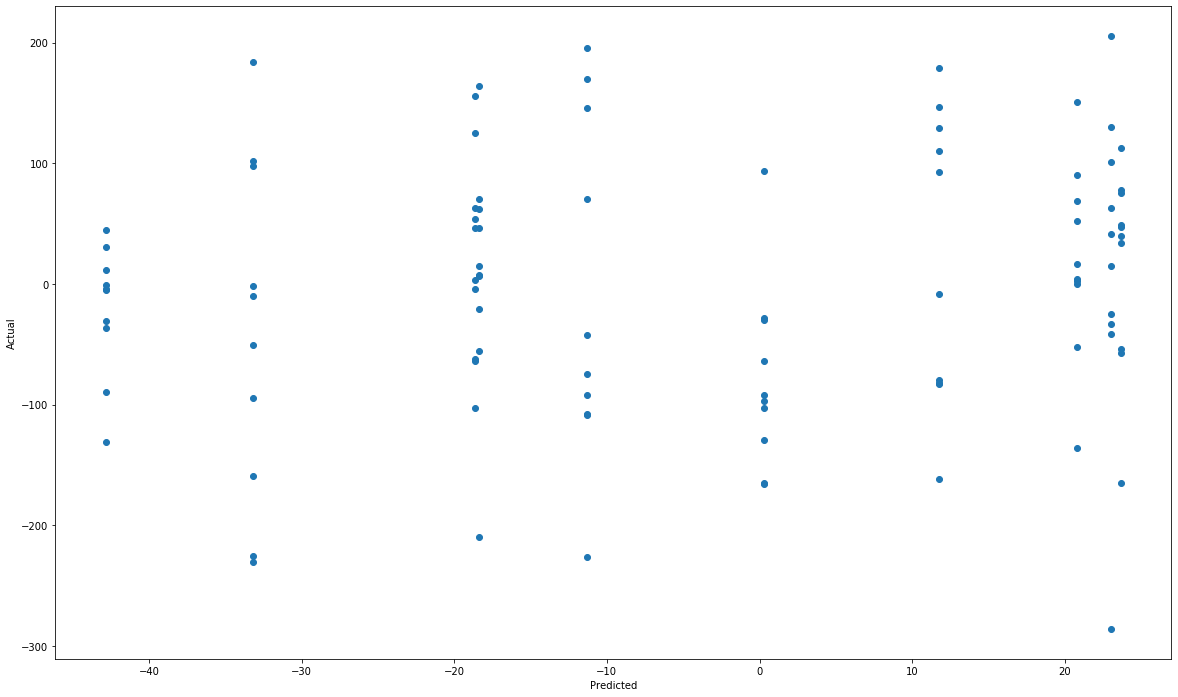

In [51]:
G = nx.erdos_renyi_graph(N,0.3)
L = nx.laplacian_matrix(G).todense()
H = H_oracle

x = np.random.multivariate_normal(np.zeros((N,)),L,size=(10,)).T

y = np.dot(H.T,x)
beta = np.dot(gamma.T,x)
print(x.shape)
plt.figure()
plt.scatter(y,beta)
plt.xlabel('Predicted')
plt.ylabel('Actual')